In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [25]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [27]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

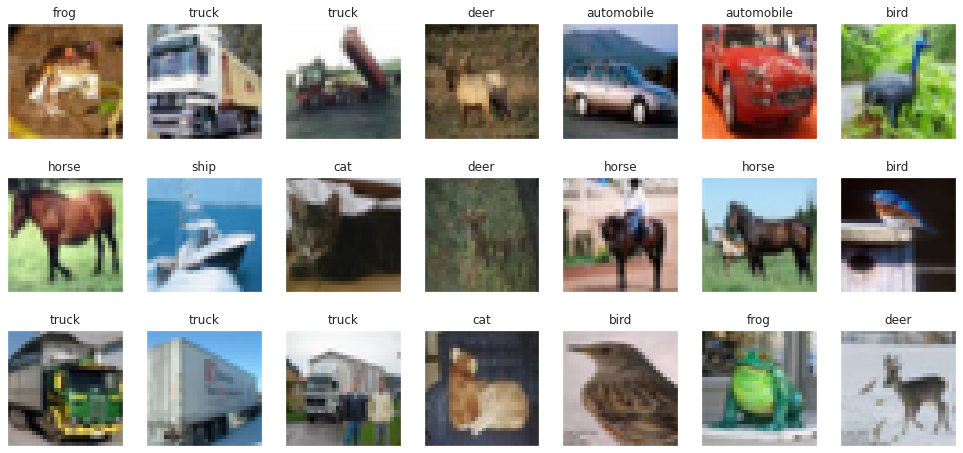

In [32]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [33]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

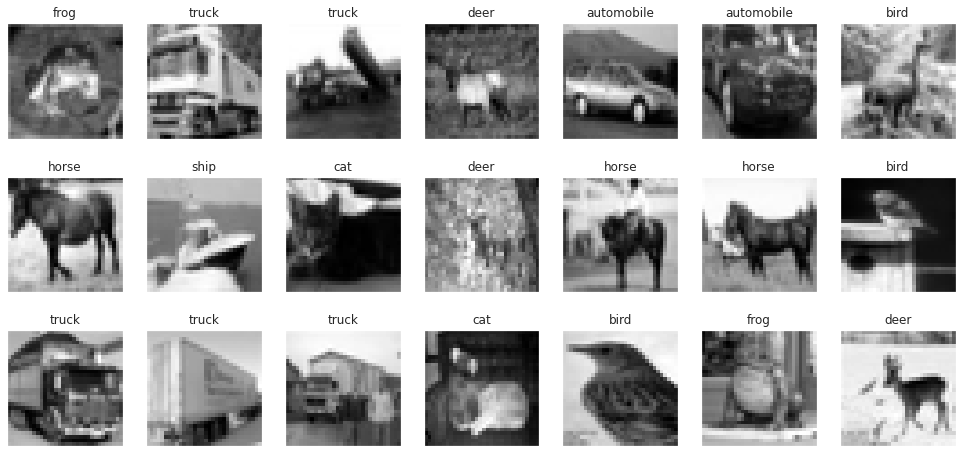

In [34]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [35]:
X_train  = X_train/255
X_test  = X_test/255

In [36]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [37]:
one_hot_encoder.fit(y_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [38]:
y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

In [39]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [40]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [41]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 16)        9232      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        1

In [43]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [44]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [45]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
1563/1563 [==============================] - 326s 208ms/step - loss: 1.9470 - acc: 0.2646 - val_loss: 1.3672 - val_acc: 0.5035
Epoch 2/10
1563/1563 [==============================] - 332s 212ms/step - loss: 1.3927 - acc: 0.5027 - val_loss: 1.1985 - val_acc: 0.5736
Epoch 3/10
1563/1563 [==============================] - 334s 214ms/step - loss: 1.1675 - acc: 0.5896 - val_loss: 1.0382 - val_acc: 0.6402
Epoch 4/10
1563/1563 [==============================] - 333s 213ms/step - loss: 1.0249 - acc: 0.6420 - val_loss: 1.0025 - val_acc: 0.6507
Epoch 5/10
1563/1563 [==============================] - 333s 213ms/step - loss: 0.9149 - acc: 0.6816 - val_loss: 0.9209 - val_acc: 0.6844
Epoch 6/10
1563/1563 [==============================] - 332s 213ms/step - loss: 0.8335 - acc: 0.7125 - val_loss: 0.8826 - val_acc: 0.7029
Epoch 7/10
1563/1563 [==============================] - 332s 213ms/step - loss: 0.7650 - acc: 0.7370 - val_loss: 0.8899 - val_acc: 0.6988
Epoch 8/10
1563/1563 [============

In [46]:
model.save('CNN_CIFAR.h5')

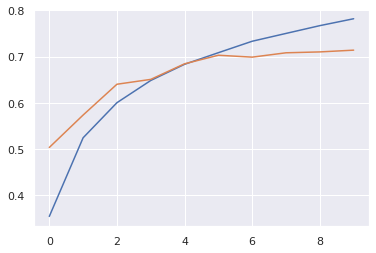

In [48]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

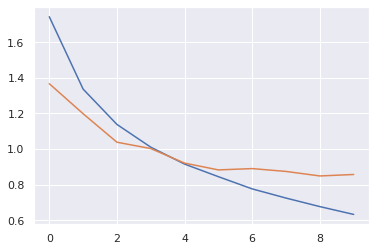

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [51]:
predictions = model.predict(X_test)
predictions = one_hot_encoder.inverse_transform(predictions)

In [52]:
y_test = one_hot_encoder.inverse_transform(y_test)
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [53]:
cm = confusion_matrix(y_test, predictions)


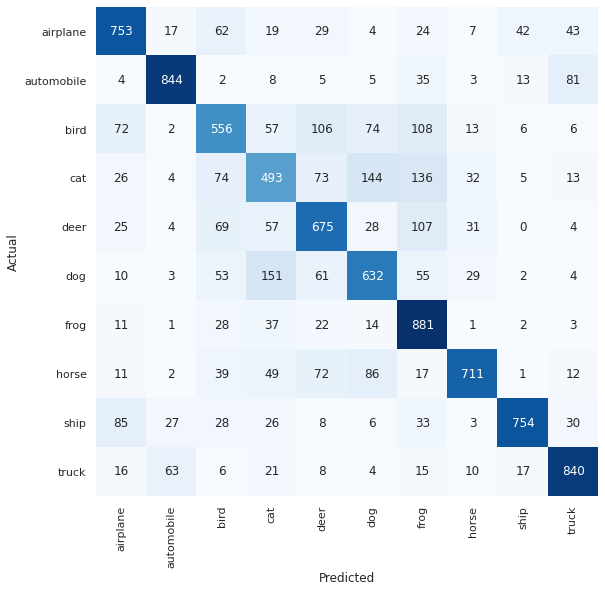

In [56]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [58]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

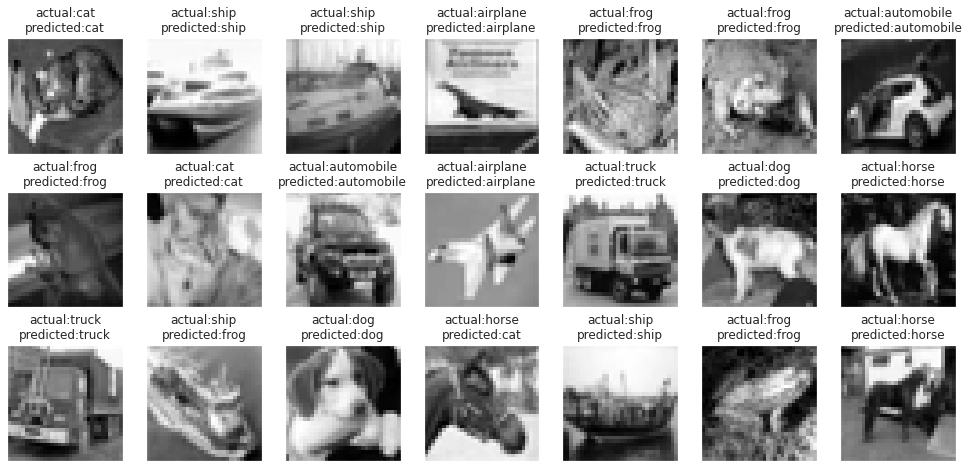

In [59]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' 
                            + 'predicted:' + labels[predictions[index][0]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()